Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 10 in Python 
---------------
- __Please put your names and student IDs here___:
    - _Lorenz Rückert_, _01/911915_
    - _Lennart Kasserra_, _01/1358216_

---

#### Exercise 1: Cluster Quality 

In Ilias you can find the dataset "assign09-1.csv". Download it and load the data. For this exercise you will need the following imports.

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
df = pd.read_csv('assign09-1.csv',names=["1","2"])

##### __(a) Cluster  the  data  using  the  K-means algorithm. Do this three times, two clusters (k = 2), three clusters (k = 3.), and five clusters (k = 5).__

_(Hint: Set the parameter of k-means to `random_state=0`. And, of course, don't forget to rescale the data, if it is needed.)_

In [64]:
# Rescale the Data
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Apply k means
ks =[2,3,5]
list_of_cluster = []
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=0,n_init=10)
    kmeans.fit(df)
    list_of_cluster.append(kmeans.predict(df))

df

,1,2
0,0.156431,0.153701
1,0.169812,0.192008
2,0.233503,0.070949
3,0.132166,0.011318
4,0.140646,0.024059
...,...,...
595,0.921845,0.826454
596,0.890515,0.779903
597,0.977257,0.810799
598,0.851075,0.927008


##### __(b) Calculate the silhouette coefficient for both of your cluster results (`k=2`, `k=3`, and `k=5`). Decide which clustering is better based on your result.__

In [65]:
silhouette_scores = []
for k, cluster in zip(ks, list_of_cluster):
    score = silhouette_score(df, cluster)
    silhouette_scores.append(score)
    print(f"For Cluster with k={k}, the silhouette score is {score}")

For Cluster with k=2, the silhouette score is 0.5556686006902974
For Cluster with k=3, the silhouette score is 0.6639055520802566
For Cluster with k=5, the silhouette score is 0.52659843310987


```
> Your solution: 
```

The silhouette score defines how similar the point is to its cluster compared to the other clusters. Here we see the means of those scores. The higher the score the better the points fit to their assigned cluster. So the selection of 3 clusters (k=3) seems to fit the data the best.

##### __(c) The cluster library allows you to get the silhouette for each individual data points. If a data point has a low silhouette, it is likely not clustered very well. For your clusterings (`k = 2`, `k = 3` and `k = 5`), plot the whole dataset in a scatterplot and color all data points with a silhouette of less than `0.5`.__

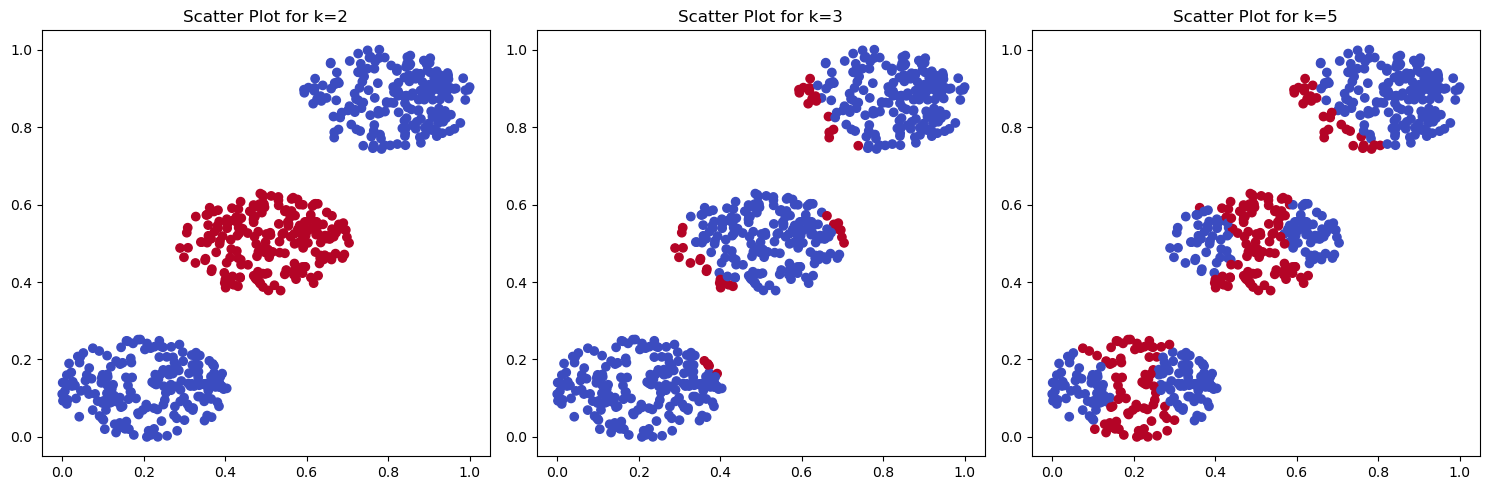

In [66]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
axes = axes.ravel()

# Plot the data with highlighted silhouette scores <0.5 
for idx, (k, cluster_labels) in enumerate(zip(ks, list_of_cluster)):
    silhouette_vals = silhouette_samples(df, cluster_labels) # get scores

    axes[idx].scatter(df.iloc[:, 0], df.iloc[:, 1], c=silhouette_vals < 0.5, cmap='coolwarm') # plot data
    axes[idx].set_title(f'Scatter Plot for k={k}') 

plt.tight_layout()
plt.show()

##### __(d) Describe and reason about the results of (c). Link the findings of (c) to your choice of clustering in (b) regarding the highlighted points.__

```
> Your solution: 
```

For k=2 and k=5 we see a lot of highlighted points because they are not very similar to the points of the cluster they got assigned to. For K=3 this a way better result, not much highlighted points because the cluster fits the points well compared to other clusters besides some outliers on the edges that are also similar to other clusters close to it.

#### Exercise 2: k-means VS k-medoids 

In Ilias you can find the dataset "assign09-2.csv". Download it and load the data. For this exercise you will need the following imports.

In [67]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

In [68]:
df = pd.read_csv('assign09-2.csv')

__(a) Cluster  the  data  using  the  *K-means* algorithm with `k=3` and plot the result.__

__(b) Cluster the data using the *K-medoids* algorithm with `k=3` and plot the results.__

__(c) Describe the results from (a) and (b). Discuss the differences and *why* the results are different?__

```
> Your solution
```

---